<a href="https://colab.research.google.com/github/Mann2406/Work/blob/work/Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [196]:
import numpy as np
import pandas as pd

In [197]:
df = pd.read_excel("C:/Users/Mahesh/Downloads/AverageFare_Q2_2023.xlsx")
df

,2023 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Quarter: Q1-2024),2023 Passengers (10% sample)
0,1,LAX,Los Angeles International,Los Angeles,CA,424.874922,433.476717,1253716
1,2,ORD,Chicago O'Hare International,Chicago-O'Hare,IL,390.636609,398.545233,1032358
2,3,DEN,Denver International,Denver,CO,360.532293,367.831440,995251
3,4,ATL,Hartsfield-Jackson Atlanta International,Atlanta,GA,397.895556,405.951141,981435
4,5,EWR,Newark Liberty International,Newark,NJ,411.699911,420.034971,930056
...,...,...,...,...,...,...,...,...
437,437,UNK,Unalakleet Airport,Unalakleet,AK,526.500000,537.159242,3
438,439,HNS,Haines Airport,Haines,AK,702.500000,716.722446,2
439,439,FRD,Friday Harbor Airport,Friday Harbor,WA,525.000000,535.628874,2
440,439,HNH,Hoonah Airport,Hoonah,AK,704.000000,718.252814,2


In [198]:
df.isnull().sum()

2023 Passenger Rank                                             0
Airport Code                                                    0
Airport Name                                                    0
City Name                                                       0
State Name                                                      0
Average Fare ($)                                                0
Inflation Adjusted Average Fare ($) (Base Quarter:  Q1-2024)    0
2023 Passengers (10% sample)                                    0
dtype: int64

In [199]:
df.isnull().sum(axis = 1)

0      0
1      0
2      0
3      0
4      0
      ..
437    0
438    0
439    0
440    0
441    0
Length: 442, dtype: int64

In [200]:
from sklearn.impute import SimpleImputer

categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

C:\Users\Mahesh\AppData\Local\Temp\ipykernel_10292\1920596219.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 8 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   2023 Passenger Rank                                           442 non-null    int64  
 1   Airport Code                                                  442 non-null    object 
 2   Airport Name                                                  442 non-null    object 
 3   City Name                                                     442 non-null    object 
 4   State Name                                                    442 non-null    object 
 5   Average Fare ($)                                              442 non-null    float64
 6   Inflation Adjusted Average Fare ($) (Base Quarter:  Q1-2024)  442 non-null    float64
 7   2023 Passengers (10% sample)                                  442 non-nu

In [202]:
numerical_columns = ['Average Fare ($)', 'Inflation Adjusted Average Fare ($) (Base Quarter:  Q1-2024)']
imputer = SimpleImputer(strategy='mean')
for col in numerical_columns:
    df[col] = imputer.fit_transform(df[[col]])

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 8 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   2023 Passenger Rank                                           442 non-null    int64  
 1   Airport Code                                                  442 non-null    object 
 2   Airport Name                                                  442 non-null    object 
 3   City Name                                                     442 non-null    object 
 4   State Name                                                    442 non-null    object 
 5   Average Fare ($)                                              442 non-null    float64
 6   Inflation Adjusted Average Fare ($) (Base Quarter:  Q1-2024)  442 non-null    float64
 7   2023 Passengers (10% sample)                                  442 non-nu

In [204]:
df.isnull().sum()

2023 Passenger Rank                                             0
Airport Code                                                    0
Airport Name                                                    0
City Name                                                       0
State Name                                                      0
Average Fare ($)                                                0
Inflation Adjusted Average Fare ($) (Base Quarter:  Q1-2024)    0
2023 Passengers (10% sample)                                    0
dtype: int64

In [205]:
df.columns

Index(['2023 Passenger Rank', 'Airport Code', 'Airport Name', 'City Name',
       'State Name', 'Average Fare ($)',
       'Inflation Adjusted Average Fare ($) (Base Quarter:  Q1-2024)',
       '2023 Passengers (10% sample)'],
      dtype='object')

In [206]:
df.shape

(442, 8)

In [207]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = df[col].astype(str)
    df[col] = label_encoder.fit_transform(df[col])

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 8 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   2023 Passenger Rank                                           442 non-null    int64  
 1   Airport Code                                                  442 non-null    int32  
 2   Airport Name                                                  442 non-null    int32  
 3   City Name                                                     442 non-null    int32  
 4   State Name                                                    442 non-null    int32  
 5   Average Fare ($)                                              442 non-null    float64
 6   Inflation Adjusted Average Fare ($) (Base Quarter:  Q1-2024)  442 non-null    float64
 7   2023 Passengers (10% sample)                                  442 non-nu

In [209]:
df.isnull().sum()

2023 Passenger Rank                                             0
Airport Code                                                    0
Airport Name                                                    0
City Name                                                       0
State Name                                                      0
Average Fare ($)                                                0
Inflation Adjusted Average Fare ($) (Base Quarter:  Q1-2024)    0
2023 Passengers (10% sample)                                    0
dtype: int64

In [210]:
df.columns

Index(['2023 Passenger Rank', 'Airport Code', 'Airport Name', 'City Name',
       'State Name', 'Average Fare ($)',
       'Inflation Adjusted Average Fare ($) (Base Quarter:  Q1-2024)',
       '2023 Passengers (10% sample)'],
      dtype='object')

In [211]:
corr_matrix = df.corr()
print(corr_matrix['Average Fare ($)'].sort_values(ascending=False))

Inflation Adjusted Average Fare ($) (Base Quarter:  Q1-2024)    1.000000
Average Fare ($)                                                1.000000
2023 Passenger Rank                                             0.383437
State Name                                                     -0.002302
City Name                                                      -0.019852
Airport Name                                                   -0.037109
Airport Code                                                   -0.053548
2023 Passengers (10% sample)                                   -0.218034
Name: Average Fare ($), dtype: float64


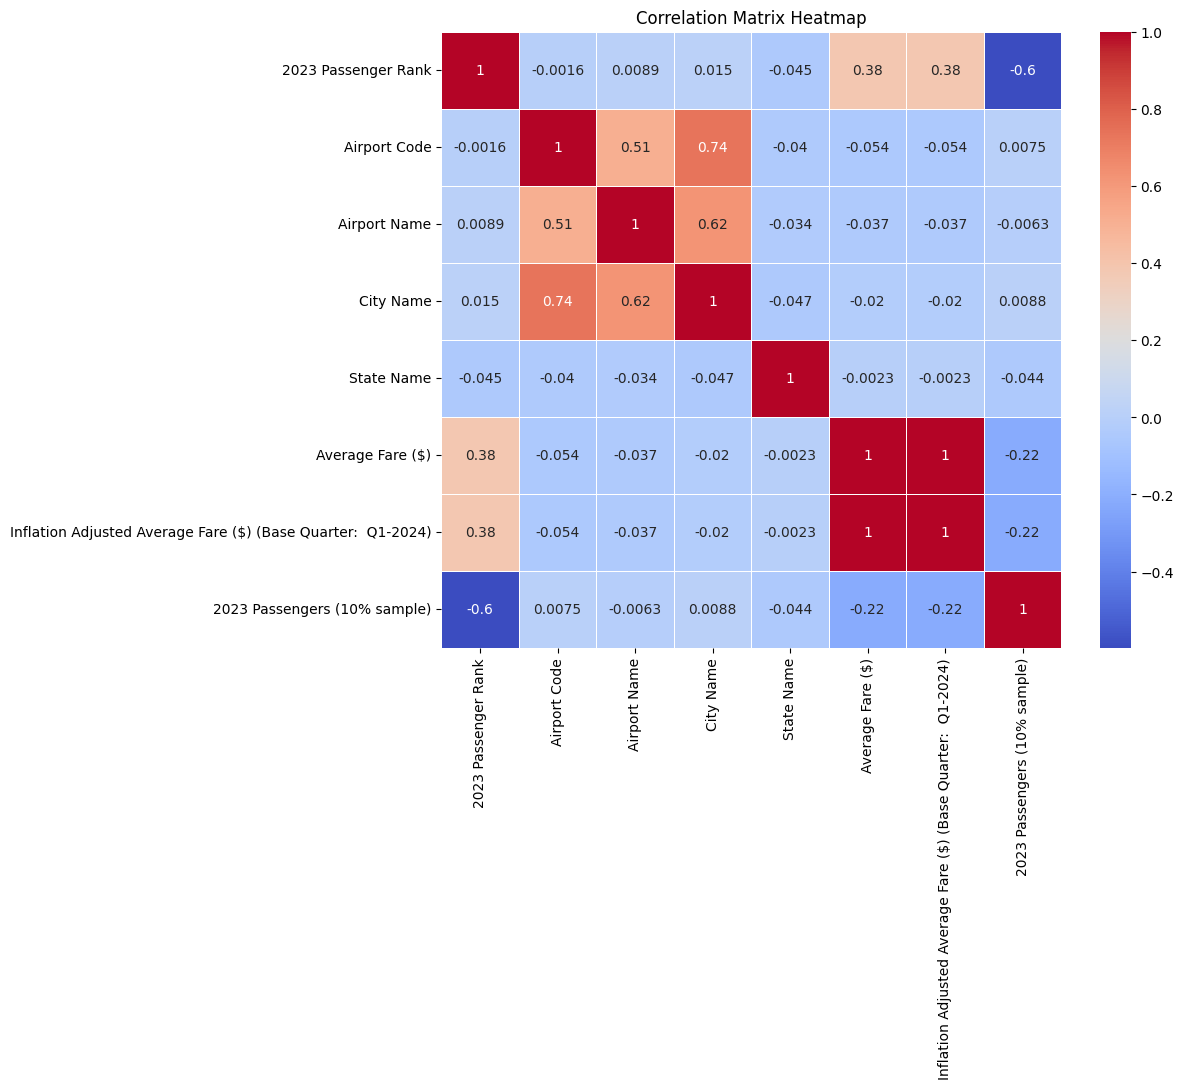

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [213]:
df.describe()

,2023 Passenger Rank,Airport Code,Airport Name,City Name,State Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Quarter: Q1-2024),2023 Passengers (10% sample)
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,4.420000e+02
mean,221.457014,220.500000,220.398190,212.138009,24.160633,487.320639,497.186677,7.585386e+04
std,127.676796,127.738666,127.580359,123.567314,16.385769,180.546543,184.201793,1.835746e+05
min,1.000000,0.000000,0.000000,0.000000,0.000000,76.931034,78.488540,2.000000e+00
25%,111.250000,110.250000,110.250000,104.250000,9.000000,397.902061,405.957777,7.627500e+02
50%,221.500000,220.500000,220.500000,211.500000,24.000000,488.405868,498.293876,5.412500e+03
75%,331.750000,330.750000,330.750000,318.750000,38.000000,570.636962,582.189778,3.837825e+04
max,439.000000,441.000000,440.000000,425.000000,53.000000,1858.000000,1895.616092,1.253716e+06


In [214]:
# Separate features and target
target_column = 'Average Fare ($)'
feature_columns = df.columns[df.columns != target_column]

X = df[feature_columns].values
y = df[target_column].values

In [226]:
from sklearn.model_selection import train_test_split
# X=df.iloc[:].values
# y=df.iloc[:].values
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
# print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 353 samples
Test set size: 89 samples


In [227]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [228]:
y_pred = regressor.predict(X_test)
y_pred

array([ 214.48327138,  592.51428571,  419.08880745,  548.87719298,
        474.83892774,  517.41666667,  374.73913043,  545.59459459,
        614.7505618 ,  431.82159195,  421.66666667,  444.47255232,
        500.95328743,  158.97052321,  546.28021978,  845.75      ,
        526.6785814 ,  597.42290076,  392.15973938,  468.84822445,
        466.41823415,  148.51929552,  303.81212022,  436.26315789,
        407.73986461,  129.34777413,  613.58235294,  573.27376655,
       1029.        ,  550.36618125,  562.16666667,  455.56274988,
        361.13900921,  545.12206573,  630.36466165,  382.83333333,
        393.90218774,  332.92042964,  544.95759717,  502.5       ,
        450.88479581,  617.84632192,  717.92433538,  430.08      ,
        448.42669469,  382.36510042,  332.9934593 ,  399.98846958,
        556.46534653,  486.3030303 ,  749.94117647,  476.01814153,
        332.56370676,  481.825     ,  420.45445636,  450.83621718,
        453.00364963,  424.87492214,  429.18349174,  741.59090

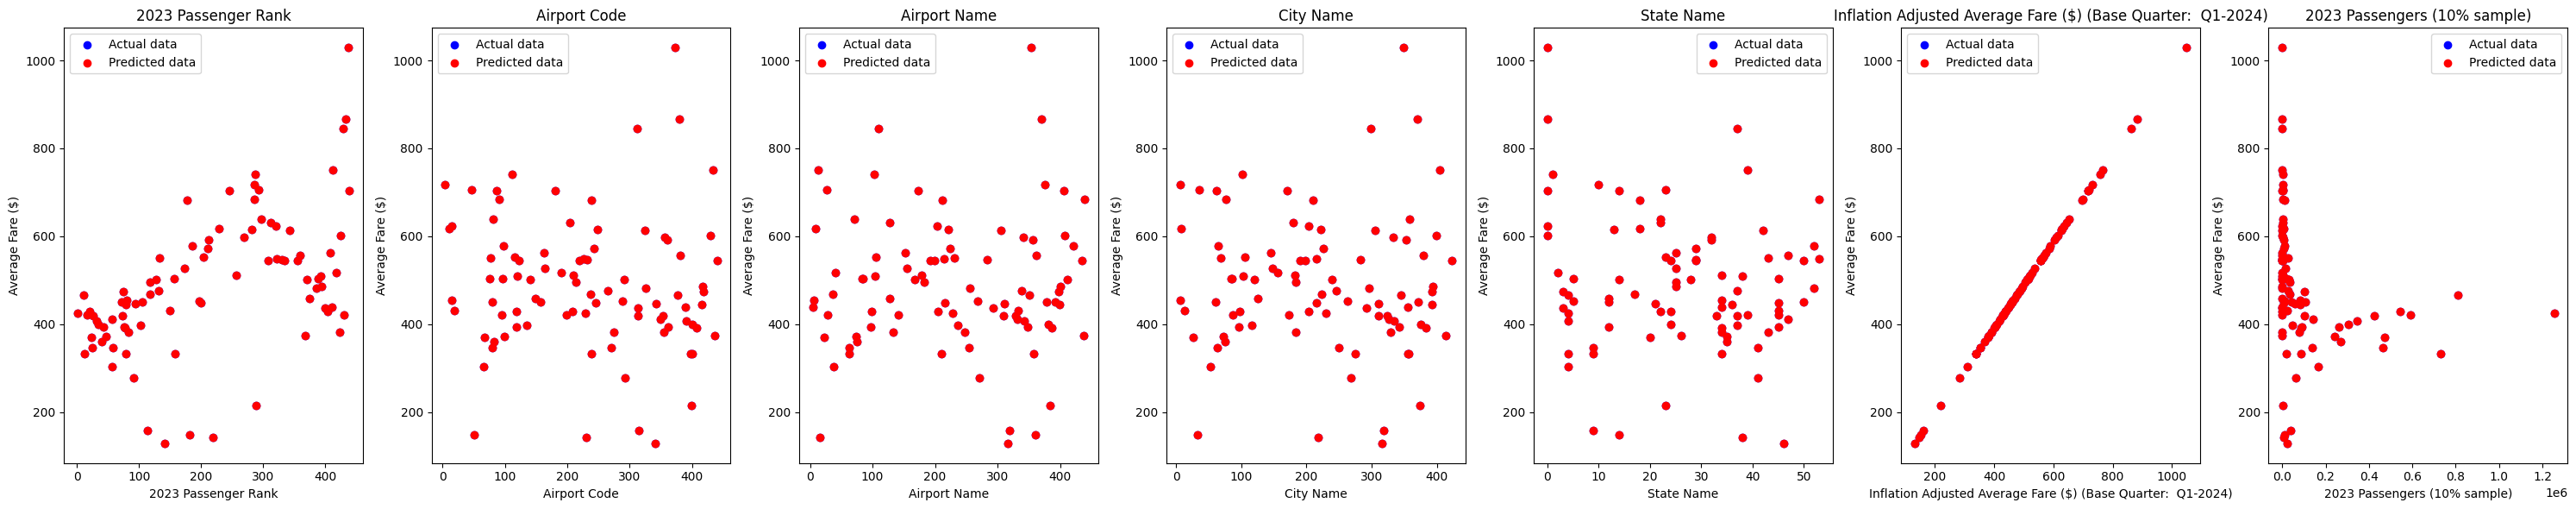

In [232]:
plt.figure(figsize=(30, 6))

for i, feature in enumerate(feature_columns):
    plt.subplot(1, len(feature_columns), i + 1)
    plt.scatter(X_test[:, i], y_test, color='blue', label='Actual data')
    plt.scatter(X_test[:, i], y_pred, color='red', label='Predicted data')
    plt.xlabel(feature)
    plt.ylabel(target_column)
    plt.title(f'{feature}')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import r2_score, accuracy_score, precision_score
r2_score(y_test, y_pred)

1.0

In [ ]:
score = regressor.score(X_test, y_test)
score

1.0

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(regressor, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R2 Scores: {cv_scores}")
print(f"Mean Cross-Validation R2 Score: {cv_scores.mean()}")


Cross-Validation R2 Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation R2 Score: 1.0
